# Lab 7 - Stereographic Mapping

Note: Assume the Earth is sphere and the radius of the Earth is 6371 km

In [101]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from numpy import log as ln
from numpy import cos as cos
from numpy import sin as sin

R=6371000 #meter

## Functions from previous lab

In [102]:
# converting ddmmss to degress
def get_degree(dd,mm,ss):
    dd= float(dd)
    mm= float(mm)
    ss=float(ss)
    degree=dd+mm/60+ss/3600
    return degree
# converting to x y z
def get_xyz(R,h,lon,lat):
    h=float(h)
    lat=np.deg2rad(get_degree(lat[0],lat[1],lat[2]))
    lon=np.deg2rad(get_degree(lon[0],lon[1],lon[2]))
    x=(R+h)*np.cos(lat)*np.cos(lon)
    y=(R+h)*np.cos(lat)*np.sin(lon)
    z=(R+h)*np.sin(lat)
    return x,y,z
def deg2xyz(R,h,lat,lon):
    lon2=np.deg2rad(lon)
    lat2=np.deg2rad(lat)
    x=(R+h)*np.cos(lat2)*np.cos(lon2)
    y=(R+h)*np.cos(lat2)*np.sin(lon2)
    z=(R+h)*np.sin(lat2)
    return x,y,z
def xyz2deg(x,y,z):
    #takes list xyz (single coord)
    r = np.sqrt(x**2 + y**2 + z**2)
    rr=np.sqrt(x**2+y**2)
    h=r-R
    lambdaa=np.arctan2(y,x)*180/np.pi
    psi=np.arctan2(z,rr)*180/np.pi
    return [h,lambdaa,psi]
def get_dms(dd):
    split_dd = math.modf(dd)
    dd= int(split_dd[1])
    mm= int(math.modf(split_dd[0] * 60)[1])
    ss= round(math.modf(split_dd[0] * 60)[0] * 60,5)
    return dd,mm,ss
def get_jocobian(lambdaa,psi,h):
    #psi=lat
    #lambda=lon
    psi=np.deg2rad(get_degree(psi[0],psi[1],psi[2]))
    lambdaa=np.deg2rad(get_degree(lambdaa[0],lambdaa[1],lambdaa[2]))
    J=np.array([
        [-(R+h)*np.cos(psi)*np.sin(lambdaa),-(R+h)*np.sin(psi)*np.cos(lambdaa),np.cos(psi)*np.cos(lambdaa)],
       [(R+h)*np.cos(psi)*np.cos(lambdaa),-(R+h)*np.sin(psi)*np.sin(lambdaa),np.cos(psi)*np.sin(lambdaa)],
      [0,(R+h)*np.cos(psi),np.sin(psi)]])
    return J


## Q1 Plot grid line, coast line, and your PoB/points using normal aspect PC, SF, MC and transverse PC, SF, MC mapping prescription. You need to provide 6 maps (PC, SF, MC, TPC, TSF, TMC) here. Use only points that are between -80° and 80° latitude for Mercator (normal and transverse) mapping.

In [103]:
poi=dict()
header=['Point_Name', 'Lon(dd)', 'Lon(mm)', 'Lon(ss)', 'Lat(dd)', 'Lat(mm)', 'Lat(ss)', 'Height (m)']
n=0
with open('poi.csv','r') as f:
    csv_reader=csv.reader(f,delimiter=',')
    for i in csv_reader:
        for j in range(8):
            if n ==0:
                poi[header[j]]=[]
            else:
                poi[header[j]].append(i[j])
        n=1
# convert ddmmss of poi into degree
poi['lon (deg)']=[]
poi['lat (deg)']=[]
for i in range(9):
    poi['lon (deg)'].append(get_degree(poi['Lon(dd)'][i],poi['Lon(mm)'][i],poi['Lon(ss)'][i]))
    poi['lat (deg)'].append(get_degree(poi['Lat(dd)'][i],poi['Lat(mm)'][i],poi['Lat(ss)'][i]))

### Normal

In [104]:
#pc
# Define Xm Ym in sinusoidal mapping system
poi['Xm_pc']=[]
poi['Ym_pc']=[]
for i in range(9):
    poi['Xm_pc'].append(np.cos(np.deg2rad(poi['lat (deg)'][i]))*poi['lon (deg)'][i])
    poi['Ym_pc'].append(poi['lat (deg)'][i])
# read coastline
coastline=dict()
coastline['lon']=[]
coastline['lat']=[]
with open('coastline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        coastline['lat'].append(float(i[0].split()[1])/60)
        coastline['lon'].append(float(i[0].split()[2])/60)
coastline['Xm_pc']=coastline['lon']
coastline['Ym_pc']=coastline['lat']
grid=dict()
grid['Xm_pc']=[]
grid['Ym_pc']=[]
with open('gridline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        grid['Ym_pc'].append(float(i[0].split()[1])/60)
        grid['Xm_pc'].append(float(i[0].split()[2])/60)

In [105]:
# SF
# read coastline and convert lon/lat to Xm, Yn

coastline['Xm_sf']=np.cos(np.deg2rad(coastline['lat']))*coastline['lon']
coastline['Ym_sf']=coastline['lat']
grid['lat']=[]
grid['lon']=[]
with open('gridline.dat','r') as f:
    csv_reader=csv.reader(f,delimiter='\t')
    for i in csv_reader:
        grid['lat'].append(float(i[0].split()[1])/60)
        grid['lon'].append(float(i[0].split()[2])/60)
grid['Xm_sf']=np.cos(np.deg2rad(grid['lat']))*grid['lon']
grid['Ym_sf']=grid['lat']
# Define Xm Ym in sinusoidal mapping system
poi['Xm_sf']=[]
poi['Ym_sf']=[]
for i in range(9):
    poi['Xm_sf'].append(np.cos(np.deg2rad(poi['lat (deg)'][i]))*poi['lon (deg)'][i])
    poi['Ym_sf'].append(poi['lat (deg)'][i])

In [106]:
# MC
from numpy import log as ln
# read coastline and convert lon/lat to Xm, Yn

coastline['Xm_m']=[]
coastline['Ym_m']=[]

coastline['Xm_m']=coastline['lon']
coastline['Ym_m']=[]
coastline['q_m']=[]
for i in range(len(coastline['lat'])):
    angle_temp=np.deg2rad(coastline['lat'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    coastline['Ym_m'].append(Ymm)
    coastline['q_m'].append(np.rad2deg(Ymm))
# Grid
grid['Xm_m']=grid['lon']
grid['Ym_m']=[]
grid['q_m']=[]
for i in range(len(grid['lat'])):
    angle_temp=np.deg2rad(grid['lat'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    grid['Ym_m'].append(Ymm)
    grid['q_m'].append(np.rad2deg(Ymm))

# compute Xm Ym for poi
poi['Xm_m']=poi['lon (deg)']
poi['Ym_m']=[]
poi['q_m']=[]
for i in range(9):
    angle_temp=np.deg2rad(poi['lat (deg)'][i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    poi['Ym_m'].append(Ymm)
    poi['q_m'].append(np.rad2deg(Ymm))

<ipython-input-106-735355fb777d>:22: RuntimeWarning: divide by zero encountered in log
  Ymm=ln(np.tan(angle_temp+np.pi/4))


In [107]:
# Get xyz for poi
poi['x']=[]
poi['y']=[]
poi['z']=[]
for i in range(9):
    poi['x'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[0])
    poi['y'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[1])
    poi['z'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[2])
# Get xyz for coastline and grid
coastline['x']=[]
coastline['y']=[]
coastline['z']=[]
for i in range(len(coastline['lon'])):
    coastline['x'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[0])
    coastline['y'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[1])
    coastline['z'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[2])
# Get xyz for grid line

grid['x']=[]
grid['y']=[]
grid['z']=[]
for i in range(len(grid['lon'])):
    grid['x'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[0])
    grid['y'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[1])
    grid['z'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[2])

In [108]:
def transverse(lambdaa,x,y,z):
    lambdaa=np.deg2rad(lambdaa)
    R1=np.array([[1,0,0],[0,0,1],[0,-1,0]])
    R2=np.array([[np.cos(lambdaa),0,-np.sin(lambdaa)],[0,1,0],[np.sin(lambdaa),0,np.cos(lambdaa)]])
    R3=np.array([[np.cos(lambdaa),np.sin(lambdaa),0],[0,0,1],[np.sin(lambdaa),-np.cos(lambdaa),0]])
    m=np.array([[x],[y],[z]])
#     t=[[np.cos(lambdaa)*x+np.sin(lambdaa)*y],[z],[np.sin(lambdaa)*x-np.cos(lambdaa)*y]]
    t=R3.dot(m)
#     t=R2.dot(R1).dot(m)
    return t
# get x',y',z' for poi
poi['x2']=[]
poi['y2']=[]
poi['z2']=[]
for i in range(9):
    poi['x2'].append(transverse(poi['lon (deg)'][0],poi['x'][i],poi['y'][i],poi['z'][i])[0][0])
    poi['y2'].append(transverse(poi['lon (deg)'][0],poi['x'][i],poi['y'][i],poi['z'][i])[1][0])
    poi['z2'].append(transverse(poi['lon (deg)'][0],poi['x'][i],poi['y'][i],poi['z'][i])[2][0])
# get x',y',z' for coastline
coastline['x2']=[]
coastline['y2']=[]
coastline['z2']=[]
for i in range(len(coastline['x'])):
    coastline['x2'].append(transverse(poi['lon (deg)'][0],coastline['x'][i],coastline['y'][i],coastline['z'][i])[0][0])
    coastline['y2'].append(transverse(poi['lon (deg)'][0],coastline['x'][i],coastline['y'][i],coastline['z'][i])[1][0])
    coastline['z2'].append(transverse(poi['lon (deg)'][0],coastline['x'][i],coastline['y'][i],coastline['z'][i])[2][0])

# get x',y',z' for grid line
grid['x2']=[]
grid['y2']=[]
grid['z2']=[]
for i in range(len(grid['x'])):
    grid['x2'].append(transverse(poi['lon (deg)'][0],grid['x'][i],grid['y'][i],grid['z'][i])[0][0])
    grid['y2'].append(transverse(poi['lon (deg)'][0],grid['x'][i],grid['y'][i],grid['z'][i])[1][0])
    grid['z2'].append(transverse(poi['lon (deg)'][0],grid['x'][i],grid['y'][i],grid['z'][i])[2][0])

### Transversed

In [109]:
# get lambda', psi', h' for poi
poi['lambda2']=[]
poi['psi2']=[]
poi['h2']=[]
for i in range(9):
    poi['h2'].append(xyz2deg(poi['x2'][i],poi['y2'][i],poi['z2'][i])[0])
    poi['lambda2'].append(xyz2deg(poi['x2'][i],poi['y2'][i],poi['z2'][i])[1])
    poi['psi2'].append(xyz2deg(poi['x2'][i],poi['y2'][i],poi['z2'][i])[2])
# get lambda', psi', h' for coastline
coastline['lambda2']=[]
coastline['psi2']=[]
coastline['h2']=[]
for i in range(len(coastline['x2'])):
    coastline['h2'].append(xyz2deg(coastline['x2'][i],coastline['y2'][i],coastline['z2'][i])[0])
    coastline['lambda2'].append(xyz2deg(coastline['x2'][i],coastline['y2'][i],coastline['z2'][i])[1])
    coastline['psi2'].append(xyz2deg(coastline['x2'][i],coastline['y2'][i],coastline['z2'][i])[2])
# get lambda', psi', h' for grid
grid['lambda2']=[]
grid['psi2']=[]
grid['h2']=[]
for i in range(len(grid['x2'])):
    grid['h2'].append(xyz2deg(grid['x2'][i],grid['y2'][i],grid['z2'][i])[0])
    grid['lambda2'].append(xyz2deg(grid['x2'][i],grid['y2'][i],grid['z2'][i])[1])
    grid['psi2'].append(xyz2deg(grid['x2'][i],grid['y2'][i],grid['z2'][i])[2])

In [110]:
# TPC
# Define Xm Ym in PC mapping system
poi['Xm_tpc']=poi['lambda2']
poi['Ym_tpc']=poi['psi2']

coastline['Xm_tpc']=coastline['lambda2']
coastline['Ym_tpc']=coastline['psi2']

grid['Xm_tpc']=grid['lambda2']
grid['Ym_tpc']=grid['psi2']

In [111]:
# TSF
# Define Xm Ym in SF mapping system
poi['Xm_tsf']=np.cos(np.deg2rad(poi['psi2']))*poi['lambda2']
poi['Ym_tsf']=poi['psi2']

coastline['Xm_tsf']=np.cos(np.deg2rad(coastline['psi2']))*coastline['lambda2']
coastline['Ym_tsf']=coastline['psi2']

grid['Xm_tsf']=np.cos(np.deg2rad(grid['psi2']))*grid['lambda2']
grid['Ym_tsf']=grid['psi2']

In [112]:
# TMC
# Define Xm Ym in mercator mapping system
poi['Xm_tm']=poi['lambda2']
poi['Ym_tm']=[]
for i in range(len(poi['psi2'])):
    angle_temp=np.deg2rad(poi['psi2'][i])/2
    Ymm=np.rad2deg(ln(np.tan(angle_temp+np.pi/4)))
    poi['Ym_tm'].append(Ymm)

coastline['Xm_tm']=coastline['lambda2']
coastline['Ym_tm']=[]
for i in range(len(coastline['psi2'])):
    angle_temp=np.deg2rad(coastline['psi2'][i])/2
    Ymm=np.rad2deg(ln(np.tan(angle_temp+np.pi/4)))
    coastline['Ym_tm'].append(Ymm)    

grid['Xm_tm']=grid['lambda2']
grid['Ym_tm']=[]
for i in range(len(grid['psi2'])):
    angle_temp=np.deg2rad(grid['psi2'][i])/2
    Ymm=np.rad2deg(ln(np.tan(angle_temp+np.pi/4)))
    grid['Ym_tm'].append(Ymm)        

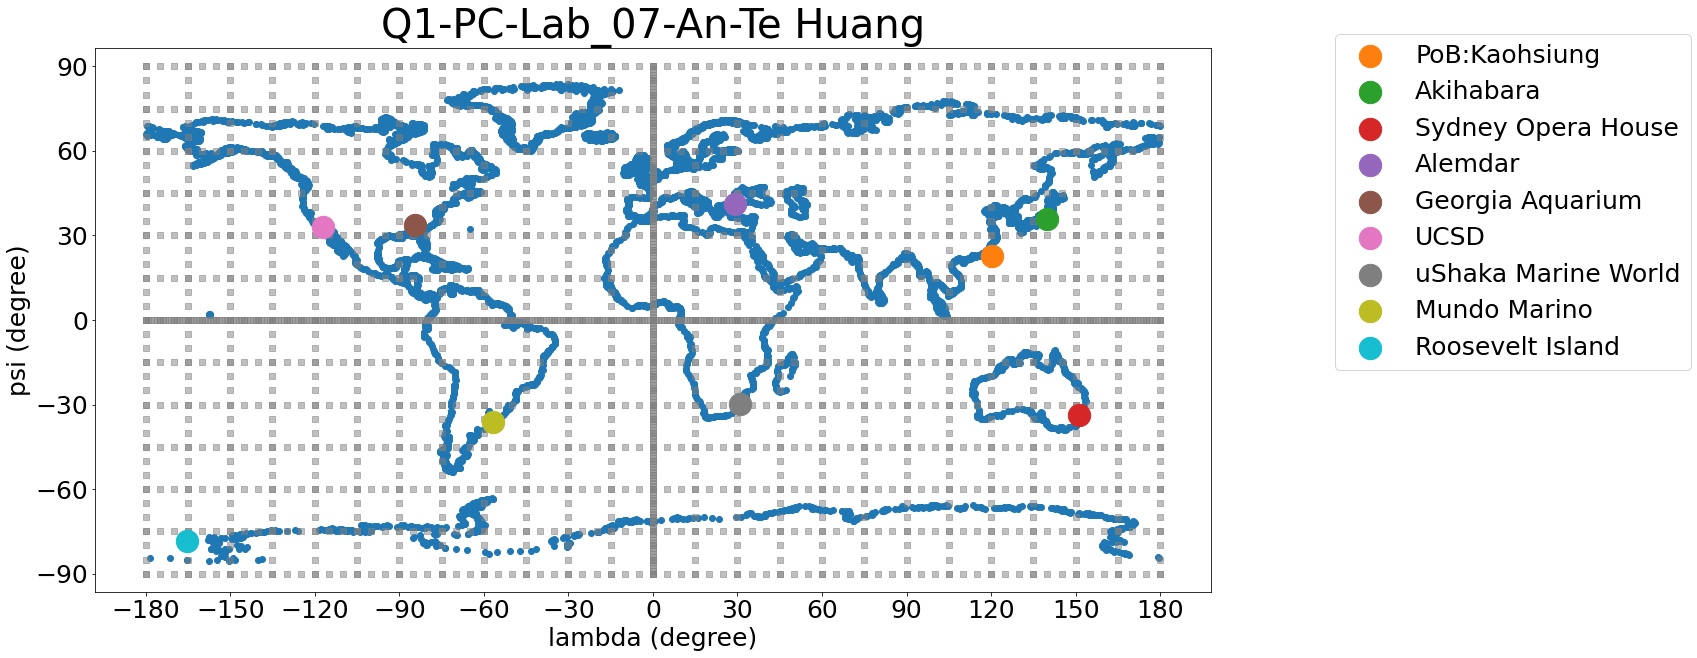

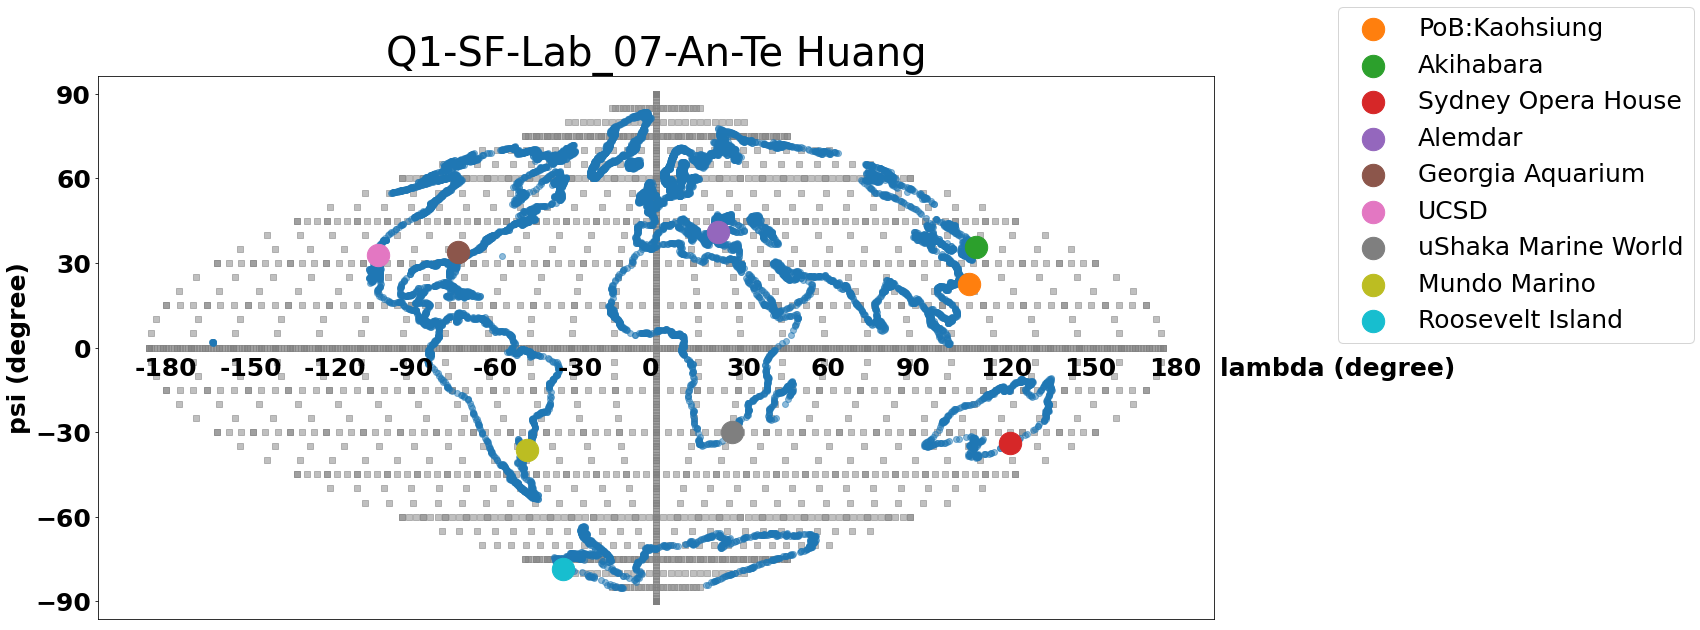

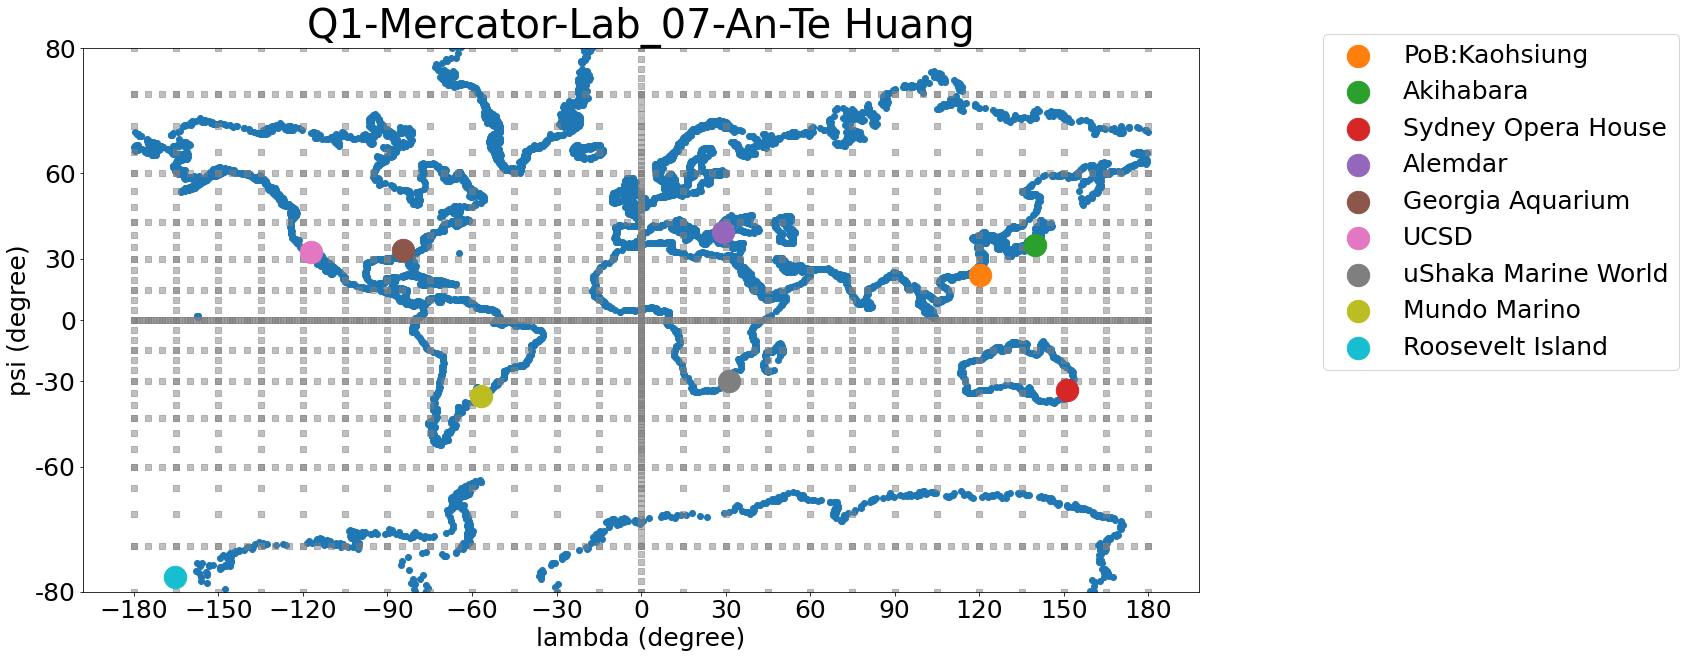

use plt.ylim() to set min y and max y to -80~80


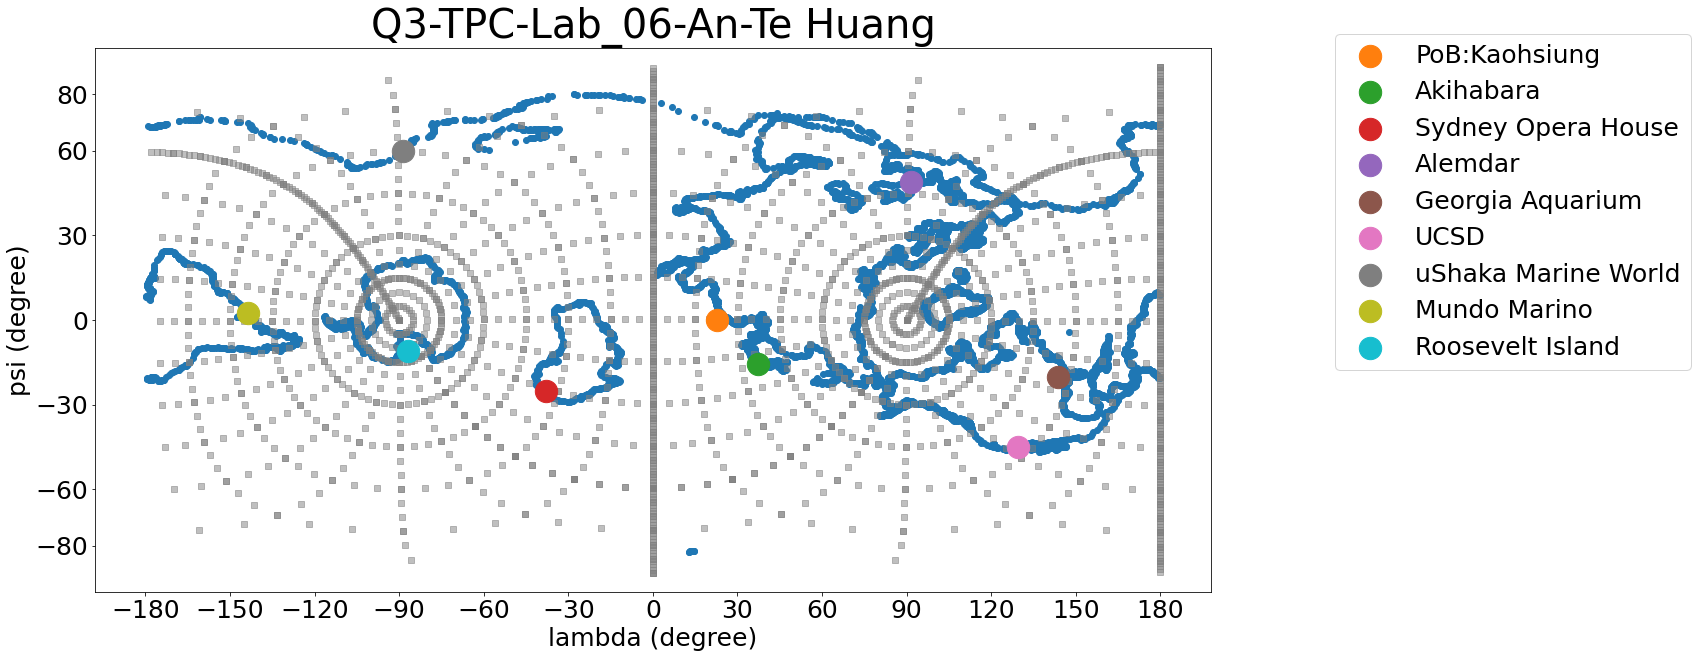

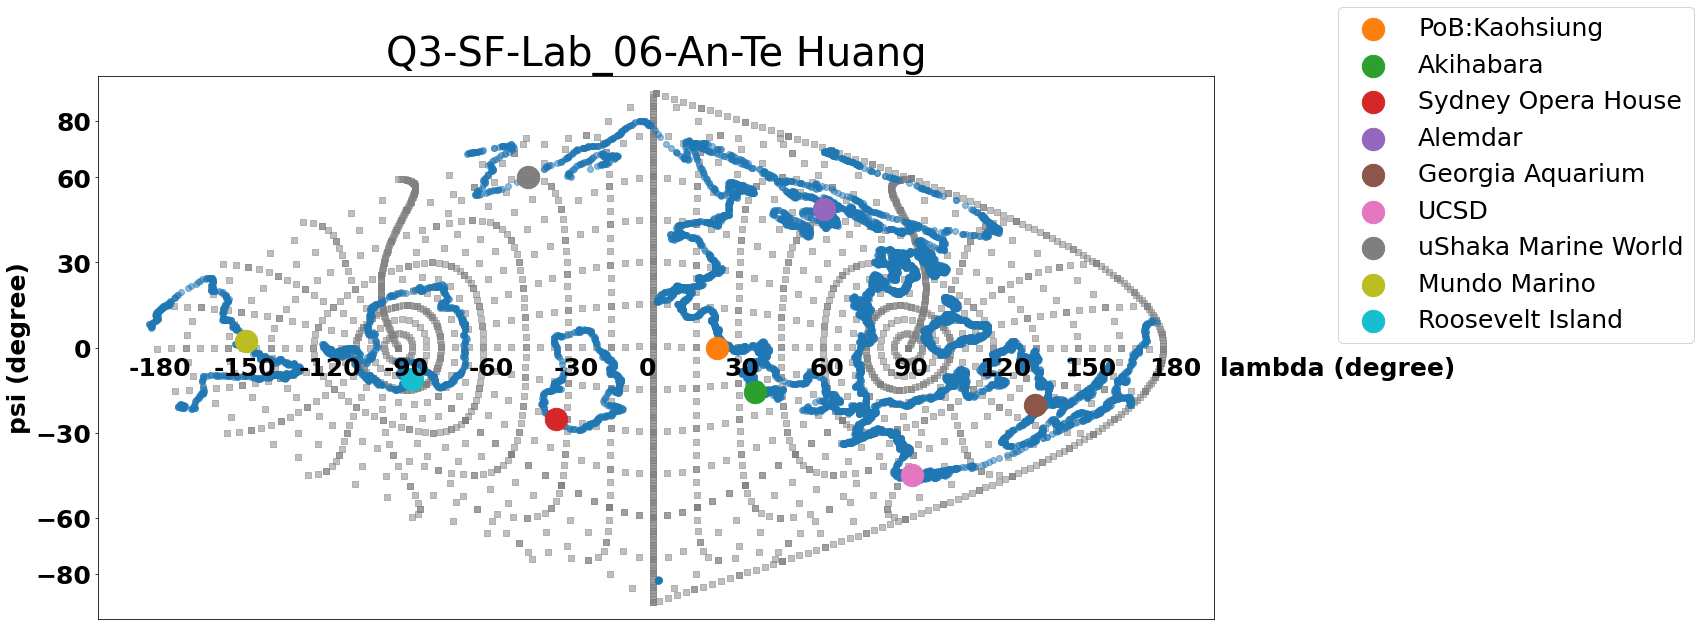

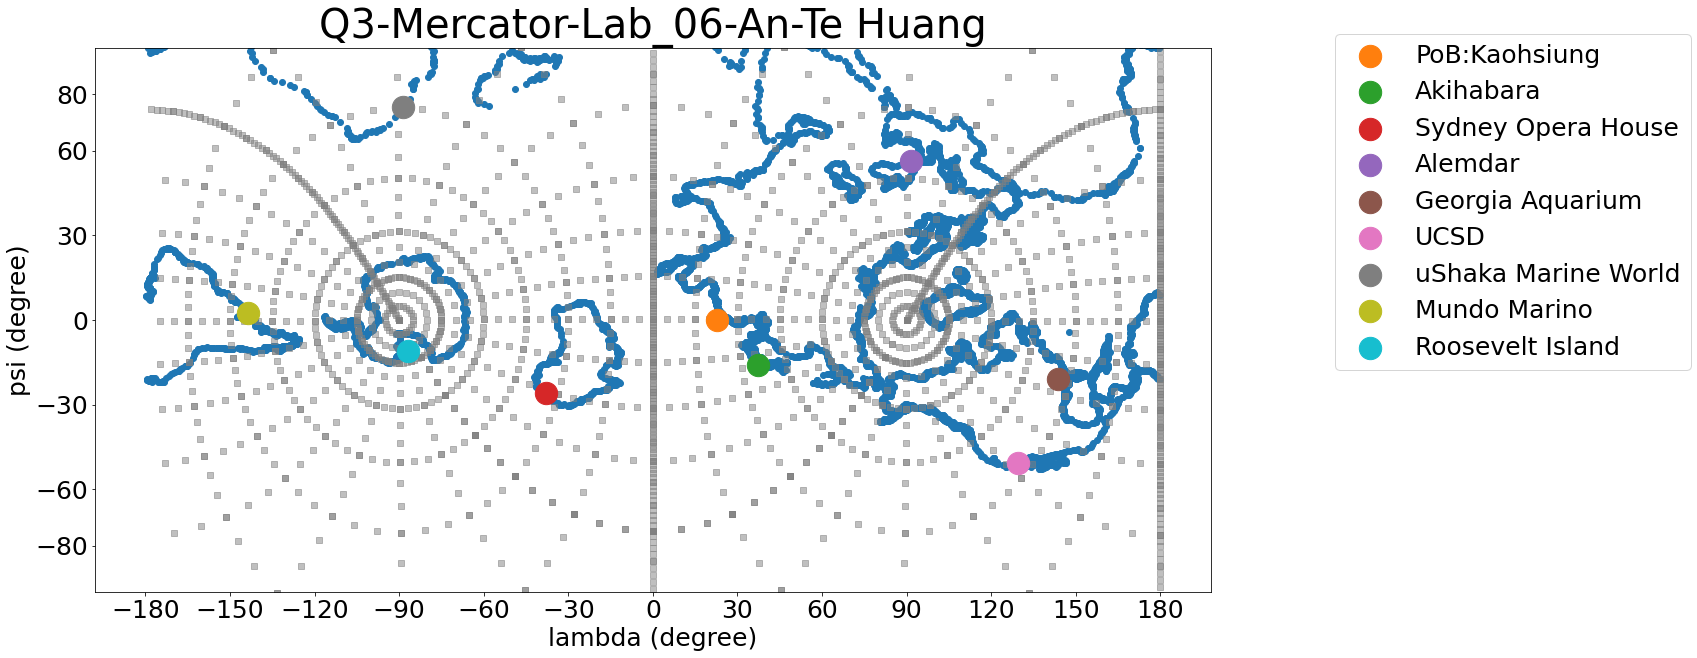

In [113]:

# plot Plate Carree
f1=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q1-PC-Lab_07-An-Te Huang',fontsize=40)
plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks([-90,-60,-30,0,30,60,90],fontsize=25)
plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline['lon'],coastline['lat'])
plt.scatter(grid['Xm_pc'],grid['Ym_pc'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['lon (deg)'][i],poi['lat (deg)'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()

## plot SF
f2=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q1-SF-Lab_07-An-Te Huang',fontsize=40)
# plt.xlabel('lambda (degree)',fontsize=25)
plt.xticks([])
Xw=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
Yw=[0 for i in range(len(Xw))]
for i in range(len(Xw)):
               plt.text(Xw[i]-5,Yw[i]-10,int(Xw[i]), fontsize=25,fontweight='bold')
plt.text(200,-10,'lambda (degree)', fontsize=25,fontweight='bold')
plt.yticks([-90,-60,-30,0,30,60,90],fontsize=25,fontweight='bold')
plt.ylabel('psi (degree)',fontsize=25,fontweight='bold')
plt.scatter(grid['Xm_sf'],grid['Ym_sf'],marker=',',color='gray',alpha=0.5)
plt.scatter(coastline['Xm_sf'],coastline['Ym_sf'], alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_sf'][i],poi['Ym_sf'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.15],fontsize=25)
plt.show()
# M
#compute q when psi =-80 and 80
ql=ln(np.tan(np.deg2rad(-80)/2+np.pi/4))
qt=ln(np.tan(np.deg2rad(80)/2+np.pi/4))
yticks=[-80,-60,-30,0,30,60,80]
labels=(-80,-60,-30,0,30,60,80)
qticks=[]
for i in range(7):
    angle_temp=np.deg2rad(yticks[i])/2
    Ymm=ln(np.tan(angle_temp+np.pi/4))
    qticks.append(Ymm)
f3=plt.figure(figsize=(20,10))
# plt.axis('equal')
plt.title('Q1-Mercator-Lab_07-An-Te Huang',fontsize=40)
plt.ylim(ql,qt)
plt.rcParams['figure.figsize'] = [15, 18]

plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks(qticks,labels,fontsize=25)
plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline['Xm_m'],coastline['Ym_m'])
plt.scatter(grid['Xm_m'],grid['Ym_m'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_m'][i],poi['Ym_m'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()
print('use plt.ylim() to set min y and max y to -80~80')
# plot Plate Carree
f1=plt.figure(figsize=(20,10))
plt.title('Q3-TPC-Lab_06-An-Te Huang',fontsize=40)
plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks([-80,-60,-30,0,30,60,80],fontsize=25)
plt.ylim(-80,80)
plt.axis('equal')

plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline['Xm_tpc'],coastline['Ym_tpc'])
plt.scatter(grid['Xm_tpc'],grid['Ym_tpc'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_tpc'][i],poi['Ym_tpc'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
# plt.show()

## plot SF
f2=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q3-SF-Lab_06-An-Te Huang',fontsize=40)
# plt.xlabel('lambda (degree)',fontsize=25)
plt.xticks([])
Xw=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
Yw=[0 for i in range(len(Xw))]
for i in range(len(Xw)):
               plt.text(Xw[i]-5,Yw[i]-10,int(Xw[i]), fontsize=25,fontweight='bold')
plt.text(200,-10,'lambda (degree)', fontsize=25,fontweight='bold')
plt.yticks([-80,-60,-30,0,30,60,80],fontsize=25,fontweight='bold')
plt.ylim(-80,80)
plt.ylabel('psi (degree)',fontsize=25,fontweight='bold')
plt.scatter(grid['Xm_tsf'],grid['Ym_tsf'],marker=',',color='gray',alpha=0.5)
plt.scatter(coastline['Xm_tsf'],coastline['Ym_tsf'], alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_tsf'][i],poi['Ym_tsf'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.15],fontsize=25)
# plt.show()
# M
#compute q when psi =-80 and 80
ql=ln(np.tan(np.deg2rad(-80)/2+np.pi/4))
qt=ln(np.tan(np.deg2rad(80)/2+np.pi/4))
yticks=[-80,-60,-30,0,30,60,80]
# labels=(-80,-60,-30,0,30,60,80)
qticks=[]
# for i in range(7):
#     angle_temp=np.deg2rad(yticks[i])/2
#     Ymm=ln(np.tan(angle_temp+np.pi/4))
#     qticks.append(Ymm)
f3=plt.figure(figsize=(20,10))
plt.axis('equal')
plt.title('Q3-Mercator-Lab_06-An-Te Huang',fontsize=40)
plt.ylim(-80,80)
# plt.rcParams['figure.figsize'] = [15, 18]

plt.xlabel('lambda (degree)',fontsize=25)
plt.yticks(yticks,fontsize=25)
plt.xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],fontsize=25)
plt.ylabel('psi (degree)',fontsize=25)
plt.scatter(coastline['Xm_tm'],coastline['Ym_tm'])
plt.scatter(grid['Xm_tm'],grid['Ym_tm'],marker=',',color='gray',alpha=0.5)
for i in range(9):
    plt.scatter(poi['Xm_tm'][i],poi['Ym_tm'][i],label=poi['Point_Name'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()

## Q2  Plot grid line, coast line, and your PoB using normal stereographic and oblique stereographic mapping (by making your PoB as a new pole) prescription. You need to provide 2 maps (ST, OST) here. Use only points that are between 0° and 105° colatitude for these maps.

### ST

In [114]:
poi['theta']=[]
poi['theta2']=[]
poi['alpha']=[]
poi["R"]=[]
poi['Point_name2']=[]
for i in range(len(poi['lat (deg)'])):
    poi['lat (deg)'][i]=float(poi['lat (deg)'][i])
    theta_temp=90-poi['lat (deg)'][i]
    poi['theta2'].append(theta_temp)
    if theta_temp>0 and theta_temp<105:
        poi['theta'].append(theta_temp)
        poi['alpha'].append(float(poi['lon (deg)'][i]))
        tempp=2*np.tan(np.deg2rad(theta_temp/2))+ln(2)
        poi["R"].append(tempp)
        poi['Point_name2'].append(poi['Point_Name'][i])
grid['theta']=[]
grid['theta2']=[]
grid['alpha']=[]
grid["R"]=[]
for i in range(len(grid['lat'])):
    theta_temp=90-grid['lat'][i]
    grid['theta2'].append(theta_temp)
    if theta_temp>0 and theta_temp<105:
        grid['theta'].append(theta_temp)
        grid['alpha'].append(float(grid['lon'][i]))
        tempp=2*np.tan(np.deg2rad(theta_temp/2))+ln(2)
        grid["R"].append(tempp)

coastline['theta']=[]
coastline['theta2']=[]
coastline['alpha']=[]
coastline["R"]=[]
for i in range(len(coastline['lat'])):
    theta_temp=90-coastline['lat'][i]
    coastline['theta2'].append(theta_temp)
    if theta_temp>0 and theta_temp<105:
        coastline['theta'].append(theta_temp)
        coastline['alpha'].append(float(coastline['lon'][i]))
        tempp=2*np.tan(np.deg2rad(theta_temp/2))+ln(2)
        coastline["R"].append(tempp)


In [115]:
poi['X_st']=[]
poi['Y_st']=[]

for i in range(len(poi['theta'])):
    poi['X_st'].append(poi['R'][i]*np.cos(np.deg2rad(poi['alpha'][i])))
    poi['Y_st'].append(poi['R'][i]*np.sin(np.deg2rad(poi['alpha'][i])))


grid['X_st']=[]
grid['Y_st']=[]
for i in range(len(grid['theta'])):
    grid['X_st'].append(grid['R'][i]*np.cos(np.deg2rad(grid['alpha'][i])))
    grid['Y_st'].append(grid['R'][i]*np.sin(np.deg2rad(grid['alpha'][i])))

coastline['X_st']=[]
coastline['Y_st']=[]
for i in range(len(coastline['theta'])):
    coastline['X_st'].append(coastline['R'][i]*np.cos(np.deg2rad(coastline['alpha'][i])))
    coastline['Y_st'].append(coastline['R'][i]*np.sin(np.deg2rad(coastline['alpha'][i])))
print(poi['X_st'])

[-1.0237515896322436, -1.3122981066430361, 1.4035498116613534, 0.1722174427911403, -0.8153814502610105]


### OST

In [116]:
def rotate(theta,x,y,z):
    A=-np.deg2rad(theta)
    B=-90+poi['lon (deg)'][0]
    B=np.deg2rad(B)
    R1=np.array([[1,0,0],[0,cos(A),sin(A)],[0,-sin(A),cos(A)]])
    R3=np.array([[cos(B),sin(B),0],[-sin(B),cos(B),0],[0,0,1]])
    m=np.array([[x],[y],[z]])
    t=R1.dot(R3).dot(m)
    return t


In [117]:
# Get xyz for poi
poi['x']=[]
poi['y']=[]
poi['z']=[]
for i in range(9):
    poi['x'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[0])
    poi['y'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[1])
    poi['z'].append(deg2xyz(R,float(poi['Height (m)'][i]),poi['lat (deg)'][i],poi['lon (deg)'][i])[2])
# Get xyz for coastline and grid
coastline['x']=[]
coastline['y']=[]
coastline['z']=[]
for i in range(len(coastline['lon'])):
    coastline['x'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[0])
    coastline['y'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[1])
    coastline['z'].append(deg2xyz(R,0,coastline['lat'][i],coastline['lon'][i])[2])
# Get xyz for grid line

grid['x']=[]
grid['y']=[]
grid['z']=[]
for i in range(len(grid['lon'])):
    grid['x'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[0])
    grid['y'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[1])
    grid['z'].append(deg2xyz(R,0,grid['lat'][i],grid['lon'][i])[2])

In [118]:
# get xyz3
# get x',y',z' for poi
poi['x3']=[]
poi['y3']=[]
poi['z3']=[]
for i in range(9):
    poi['x3'].append(rotate(poi['theta2'][i],poi['x'][i],poi['y'][i],poi['z'][i])[0][0])
    poi['y3'].append(rotate(poi['theta2'][i],poi['x'][i],poi['y'][i],poi['z'][i])[1][0])
    poi['z3'].append(rotate(poi['theta2'][i],poi['x'][i],poi['y'][i],poi['z'][i])[2][0])
# get x',y',z' for coastline
coastline['x3']=[]
coastline['y3']=[]
coastline['z3']=[]
for i in range(len(coastline['x'])):
    coastline['x3'].append(rotate(coastline['theta2'][i],coastline['x'][i],coastline['y'][i],coastline['z'][i])[0][0])
    coastline['y3'].append(rotate(coastline['theta2'][i],coastline['x'][i],coastline['y'][i],coastline['z'][i])[1][0])
    coastline['z3'].append(rotate(coastline['theta2'][i],coastline['x'][i],coastline['y'][i],coastline['z'][i])[2][0])

# get x',y',z' for grid line
grid['x3']=[]
grid['y3']=[]
grid['z3']=[]
for i in range(len(grid['x'])):
    grid['x3'].append(transverse(grid['theta2'][i],grid['x'][i],grid['y'][i],grid['z'][i])[0][0])
    grid['y3'].append(transverse(grid['theta2'][i],grid['x'][i],grid['y'][i],grid['z'][i])[1][0])
    grid['z3'].append(transverse(grid['theta2'][i],grid['x'][i],grid['y'][i],grid['z'][i])[2][0])

In [119]:
# get lambda', psi', h' for poi
poi['lambda3']=[]
poi['psi3']=[]
poi['h3']=[]
for i in range(9):
    poi['h3'].append(xyz2deg(poi['x3'][i],poi['y3'][i],poi['z3'][i])[0])
    poi['lambda3'].append(xyz2deg(poi['x3'][i],poi['y3'][i],poi['z3'][i])[1])
    poi['psi3'].append(xyz2deg(poi['x3'][i],poi['y3'][i],poi['z3'][i])[2])
# get lambda', psi', h' for coastline
coastline['lambda3']=[]
coastline['psi3']=[]
coastline['h3']=[]
for i in range(len(coastline['x3'])):
    coastline['h3'].append(xyz2deg(coastline['x3'][i],coastline['y3'][i],coastline['z3'][i])[0])
    coastline['lambda3'].append(xyz2deg(coastline['x3'][i],coastline['y3'][i],coastline['z3'][i])[1])
    coastline['psi3'].append(xyz2deg(coastline['x3'][i],coastline['y3'][i],coastline['z3'][i])[2])
# get lambda', psi', h' for grid
grid['lambda3']=[]
grid['psi3']=[]
grid['h3']=[]
for i in range(len(grid['x3'])):
    grid['h3'].append(xyz2deg(grid['x3'][i],grid['y3'][i],grid['z3'][i])[0])
    grid['lambda3'].append(xyz2deg(grid['x3'][i],grid['y3'][i],grid['z3'][i])[1])
    grid['psi3'].append(xyz2deg(grid['x3'][i],grid['y3'][i],grid['z3'][i])[2])

In [120]:
poi['theta3']=[]
poi['alpha3']=[]
poi["R3"]=[]
poi['Point_name3']=[]
for i in range(len(poi['psi3'])):
    poi['psi3'][i]=float(poi['psi3'][i])
    theta_temp=90-poi['psi3'][i]
    if theta_temp>0 and theta_temp<105:
        poi['theta3'].append(theta_temp)
        poi['alpha3'].append(float(poi['lambda3'][i]))
        tempp=2*np.tan(np.deg2rad(theta_temp/2))+ln(2)
        poi["R3"].append(tempp)
        poi['Point_name3'].append(poi['Point_Name'][i])
grid['theta3']=[]
# grid['theta2']=[]
grid['alpha3']=[]
grid["R3"]=[]
for i in range(len(grid['psi3'])):
    theta_temp=90-grid['psi3'][i]
#     grid['theta3'].append(theta_temp)
    if theta_temp>=0 and theta_temp<105:
        grid['theta3'].append(theta_temp)
        grid['alpha3'].append(float(grid['lambda3'][i]))
        tempp=2*np.tan(np.deg2rad(theta_temp/2))+ln(2)
        grid["R3"].append(tempp)

coastline['theta3']=[]
# coastline['theta2']=[]
coastline['alpha3']=[]
coastline["R3"]=[]
for i in range(len(coastline['psi3'])):
    theta_temp=90-coastline['psi3'][i]
#     coastline['theta3'].append(theta_temp)
    if theta_temp>0 and theta_temp<105:
        coastline['theta3'].append(theta_temp)
        coastline['alpha3'].append(float(coastline['lambda3'][i]))
        tempp=2*np.tan(np.deg2rad(theta_temp/2))+ln(2)
        coastline["R3"].append(tempp)

In [121]:
poi['X_ost']=[]
poi['Y_ost']=[]

for i in range(len(poi['theta3'])):
    poi['X_ost'].append(poi['R3'][i]*np.cos(np.deg2rad(poi['alpha3'][i])))
    poi['Y_ost'].append(poi['R3'][i]*np.sin(np.deg2rad(poi['alpha3'][i])))


grid['X_ost']=[]
grid['Y_ost']=[]
for i in range(len(grid['theta3'])):
    grid['X_ost'].append(grid['R3'][i]*np.cos(np.deg2rad(grid['alpha3'][i])))
    grid['Y_ost'].append(grid['R3'][i]*np.sin(np.deg2rad(grid['alpha3'][i])))

coastline['X_ost']=[]
coastline['Y_ost']=[]
for i in range(len(coastline['theta3'])):
    coastline['X_ost'].append(coastline['R3'][i]*np.cos(np.deg2rad(coastline['alpha3'][i])))
    coastline['Y_ost'].append(coastline['R3'][i]*np.sin(np.deg2rad(coastline['alpha3'][i])))
print(poi['X_ost'])

[-0.9648697087634612, -1.132896853344098, 1.6401468197882032, -2.039982146740718, 2.0015633731175373, -0.7504129991140361]


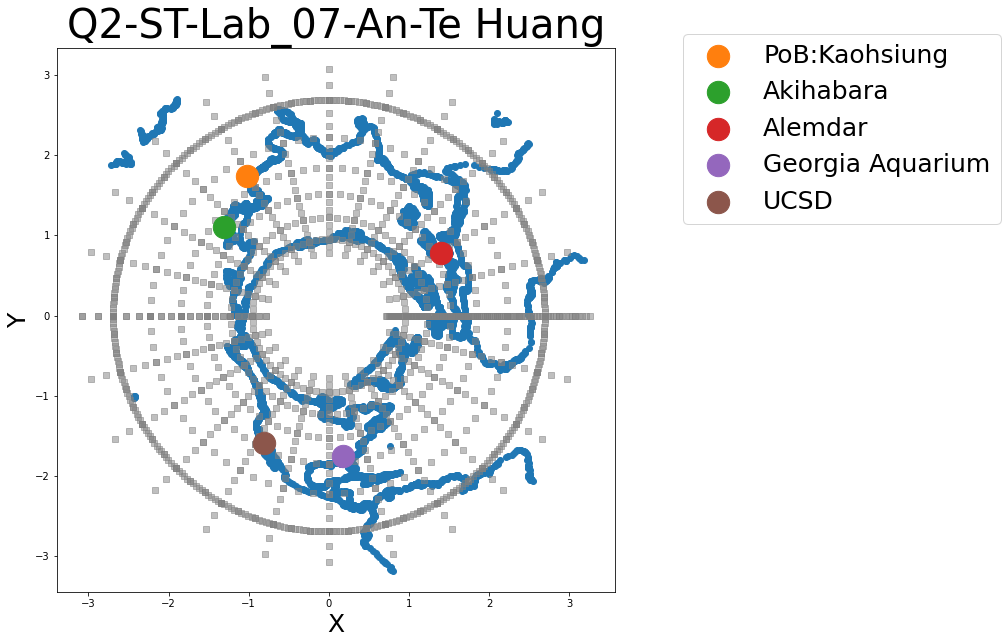

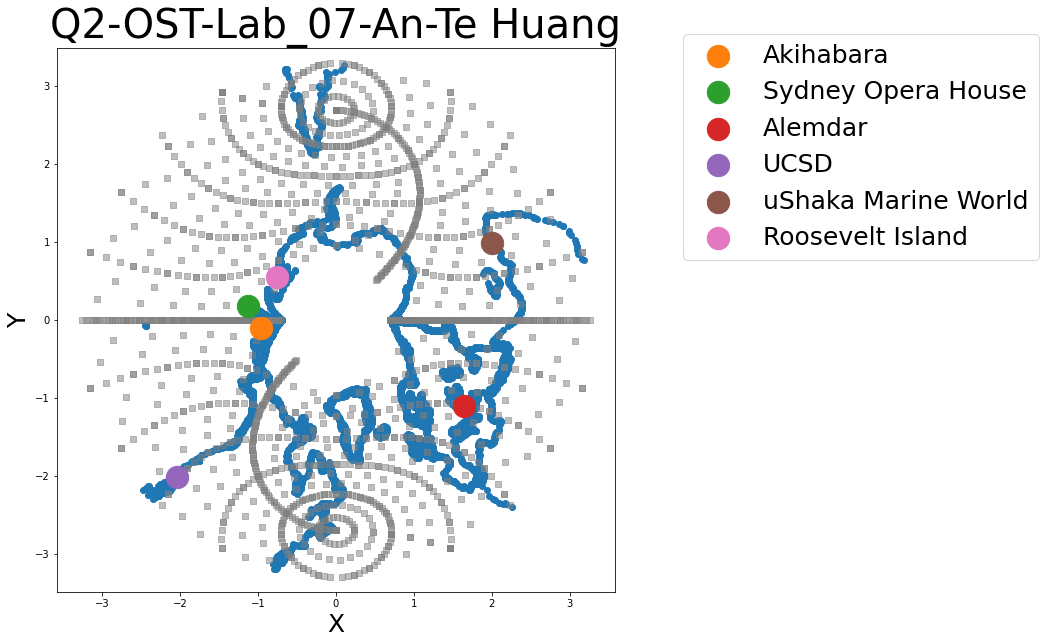

In [122]:
#plot
f4=plt.figure(figsize=(10,10))
plt.axis('equal')
plt.title('Q2-ST-Lab_07-An-Te Huang',fontsize=40)
plt.xlabel('X',fontsize=25)
plt.ylabel("Y",fontsize=25)
plt.scatter(coastline['X_st'],coastline['Y_st'])
plt.scatter(grid['X_st'],grid['Y_st'],marker=',',color='gray',alpha=0.5)
for i in range(len(poi['theta'])):
    plt.scatter(poi['X_st'][i],poi['Y_st'][i],label=poi['Point_name2'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()
#plot
f5=plt.figure(figsize=(10,10))
plt.axis('equal')
plt.title('Q2-OST-Lab_07-An-Te Huang',fontsize=40)
plt.xlabel('X',fontsize=25)
plt.ylabel("Y",fontsize=25)
plt.scatter(coastline['X_ost'],coastline['Y_ost'])
plt.scatter(grid['X_ost'],grid['Y_ost'],marker=',',color='gray',alpha=0.5)
for i in range(len(poi['theta3'])):
    plt.scatter(poi['X_ost'][i],poi['Y_ost'][i],label=poi['Point_name3'][i],s=500)
plt.legend(bbox_to_anchor=[1.1,1.05],fontsize=25)
plt.show()

In [ ]:
print('?')